# EDA y visualizacion

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Ezegarcia07/F1/refs/heads/main/f1_completed.csv")

In [4]:
df.head()

,resultId,raceId,driverName,constructorName,grid,positionText,points,circuitName,year,grandPrixName,date
0,1,18,Lewis Hamilton,McLaren,1,1,10.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16
1,2,18,Nick Heidfeld,BMW Sauber,5,2,8.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16
2,3,18,Nico Rosberg,Williams,7,3,6.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16
3,4,18,Fernando Alonso,Renault,11,4,5.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16
4,5,18,Heikki Kovalainen,McLaren,3,5,4.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16


In [5]:
df.columns

Index(['resultId', 'raceId', 'driverName', 'constructorName', 'grid',
       'positionText', 'points', 'circuitName', 'year', 'grandPrixName',
       'date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26519 non-null  int64  
 1   raceId           26519 non-null  int64  
 2   driverName       26519 non-null  object 
 3   constructorName  26519 non-null  object 
 4   grid             26519 non-null  int64  
 5   positionText     26519 non-null  object 
 6   points           26519 non-null  float64
 7   circuitName      26519 non-null  object 
 8   year             26519 non-null  int64  
 9   grandPrixName    26519 non-null  object 
 10  date             26519 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.2+ MB


##  Tema 1: Dominio de equipos y pilotos en diferentes épocas
**¿Qué equipos han dominado diferentes épocas de la Fórmula 1? (Análisis en el sector de deportes (Sports Analytics))**

- Vemos primero quienes son los pilotos con mas titulos mundiales

In [ ]:
campeonatos_driver = df.groupby(['year', 'driverName'])["points"].sum().reset_index(name='puntaje_total')
campeonatos_driver = campeonatos_driver.loc[campeonatos_driver.groupby('year')['puntaje_total'].idxmax()]

campeonatos_driver_count = campeonatos_driver['driverName'].value_counts().reset_index()
campeonatos_driver_count.columns = ['driverName', 'campeonatos_mundiales_driver']
campeonatos_driver_count

,driverName,campeonatos_mundiales_driver
0,Lewis Hamilton,7
1,Michael Schumacher,7
2,Juan Fangio,5
3,Alain Prost,5
4,Sebastian Vettel,4
5,Max Verstappen,4
6,Niki Lauda,3
7,Graham Hill,3
8,Jack Brabham,3
9,Nelson Piquet,3


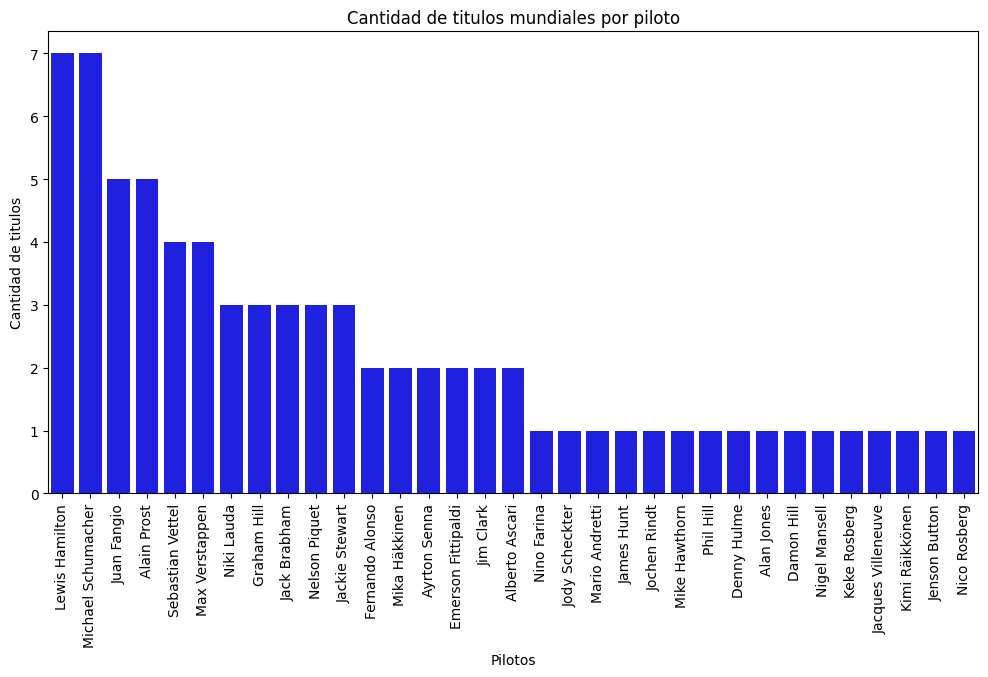

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='driverName', y='campeonatos_mundiales_driver', data=campeonatos_driver_count, color='b')

plt.title('Cantidad de titulos mundiales por piloto')
plt.xlabel('Pilotos')
plt.ylabel('Cantidad de titulos')
plt.xticks(rotation=90)

plt.show()

El gran Michael Schumacher y Lewis Hamilton liderando la tabla historica, sguido del argentino Juan Manuel Fangio.

- Pasemos al analisis por decada de las escuderias. Primero agruparemos los años en intervalos de 10 años

In [7]:
df['decade'] = (df['year'] // 10) * 10

In [8]:
(df[['year', 'decade']].sample(5))

,year,decade
13714,1977,1970
25851,2023,2020
22640,2015,2010
11460,1982,1980
15238,1973,1970


- Comenzaremos el analisis por decada pero antes definamos una metrica para esto dado que si usamos los puntajes nos encontramos que la FIA ha ido cambiando el sistema de puntuacion a traves de los años. Que haremos? usaremos el primer sistema de puntuacion que uso en las primeras temporadas, el sistema de puntuación original (8-6-4-3-2 para los primeros 5 puestos) para todas las temporadas es una manera justa de igualar las condiciones y hacer comparaciones más equitativas entre diferentes épocas de la F1.  
Razón detrás de esta elección:  
Equidad histórica: Al principio solo se puntuaban los primeros 5, y ajustarlo a ese sistema para todas las temporadas elimina la posibilidad de que las escuderías más recientes obtengan una ventaja desproporcionada por el sistema de puntuación expandido.  
Menos sesgo: Si tomamos solo los primeros 5 puestos, mitigamos el efecto del mayor número de escuderías o pilotos en las temporadas recientes, donde los puntos se distribuyen más ampliamente. En el pasado, las primeras posiciones eran mucho más determinantes para el rendimiento de los equipos.

In [49]:
def asignar_puntos_f1(row):
    if row['positionText'] == '1':
        return 8
    elif row['positionText'] == '2':
        return 6
    elif row['positionText'] == '3':
        return 4
    elif row['positionText'] == '4':
        return 3
    elif row['positionText'] == '5':
        return 2
    else:
        return 0

df['puntos_ajustados'] = df.apply(asignar_puntos_f1, axis=1)



In [50]:
df.head()

,resultId,raceId,driverName,constructorName,grid,positionText,points,circuitName,year,grandPrixName,date,decade,puntos_ajustados
0,1,18,Lewis Hamilton,McLaren,1,1,10.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16,2000,8
1,2,18,Nick Heidfeld,BMW Sauber,5,2,8.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16,2000,6
2,3,18,Nico Rosberg,Williams,7,3,6.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16,2000,4
3,4,18,Fernando Alonso,Renault,11,4,5.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16,2000,3
4,5,18,Heikki Kovalainen,McLaren,3,5,4.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix,2008-03-16,2000,2


- Ahora si, vamos al analisis por decada. Agrupamos usando 'constructorName', 'decade' y vemos la cantidad de puntos_ajustados obtuvieron.

In [15]:
puntos_por_decada = df.groupby(['constructorName', 'decade'])['puntos_ajustados'].sum().reset_index()
puntos_por_decada.head()

,constructorName,decade,puntos_ajustados
0,AFM,1950,0
1,AGS,1980,0
2,AGS,1990,0
3,ATS,1960,0
4,ATS,1970,2


- Antes de graficar esto vamos a dropear todas las escuderias que hayan tenido un total de 0 en la suma de las decadas. Esto no va a ayudar a no tener tantas escuderias en la parte de referencias del grafico

In [16]:
total_puntos_por_equipo = puntos_por_decada.groupby('constructorName')['puntos_ajustados'].sum().reset_index()

escuderias_con_puntos = total_puntos_por_equipo[total_puntos_por_equipo['puntos_ajustados'] > 0]

puntos_por_decada_filtrado = puntos_por_decada[puntos_por_decada['constructorName'].isin(escuderias_con_puntos['constructorName'])]
puntos_por_decada_filtrado.head()

,constructorName,decade,puntos_ajustados
3,ATS,1960,0
4,ATS,1970,2
5,ATS,1980,4
7,Alfa Romeo,1950,163
8,Alfa Romeo,1960,0


- Ahora si grafiquemos para una mejor interpretacion de los resultados. Le asignamos un color a las principales escuderias para una mejor visualizacion.

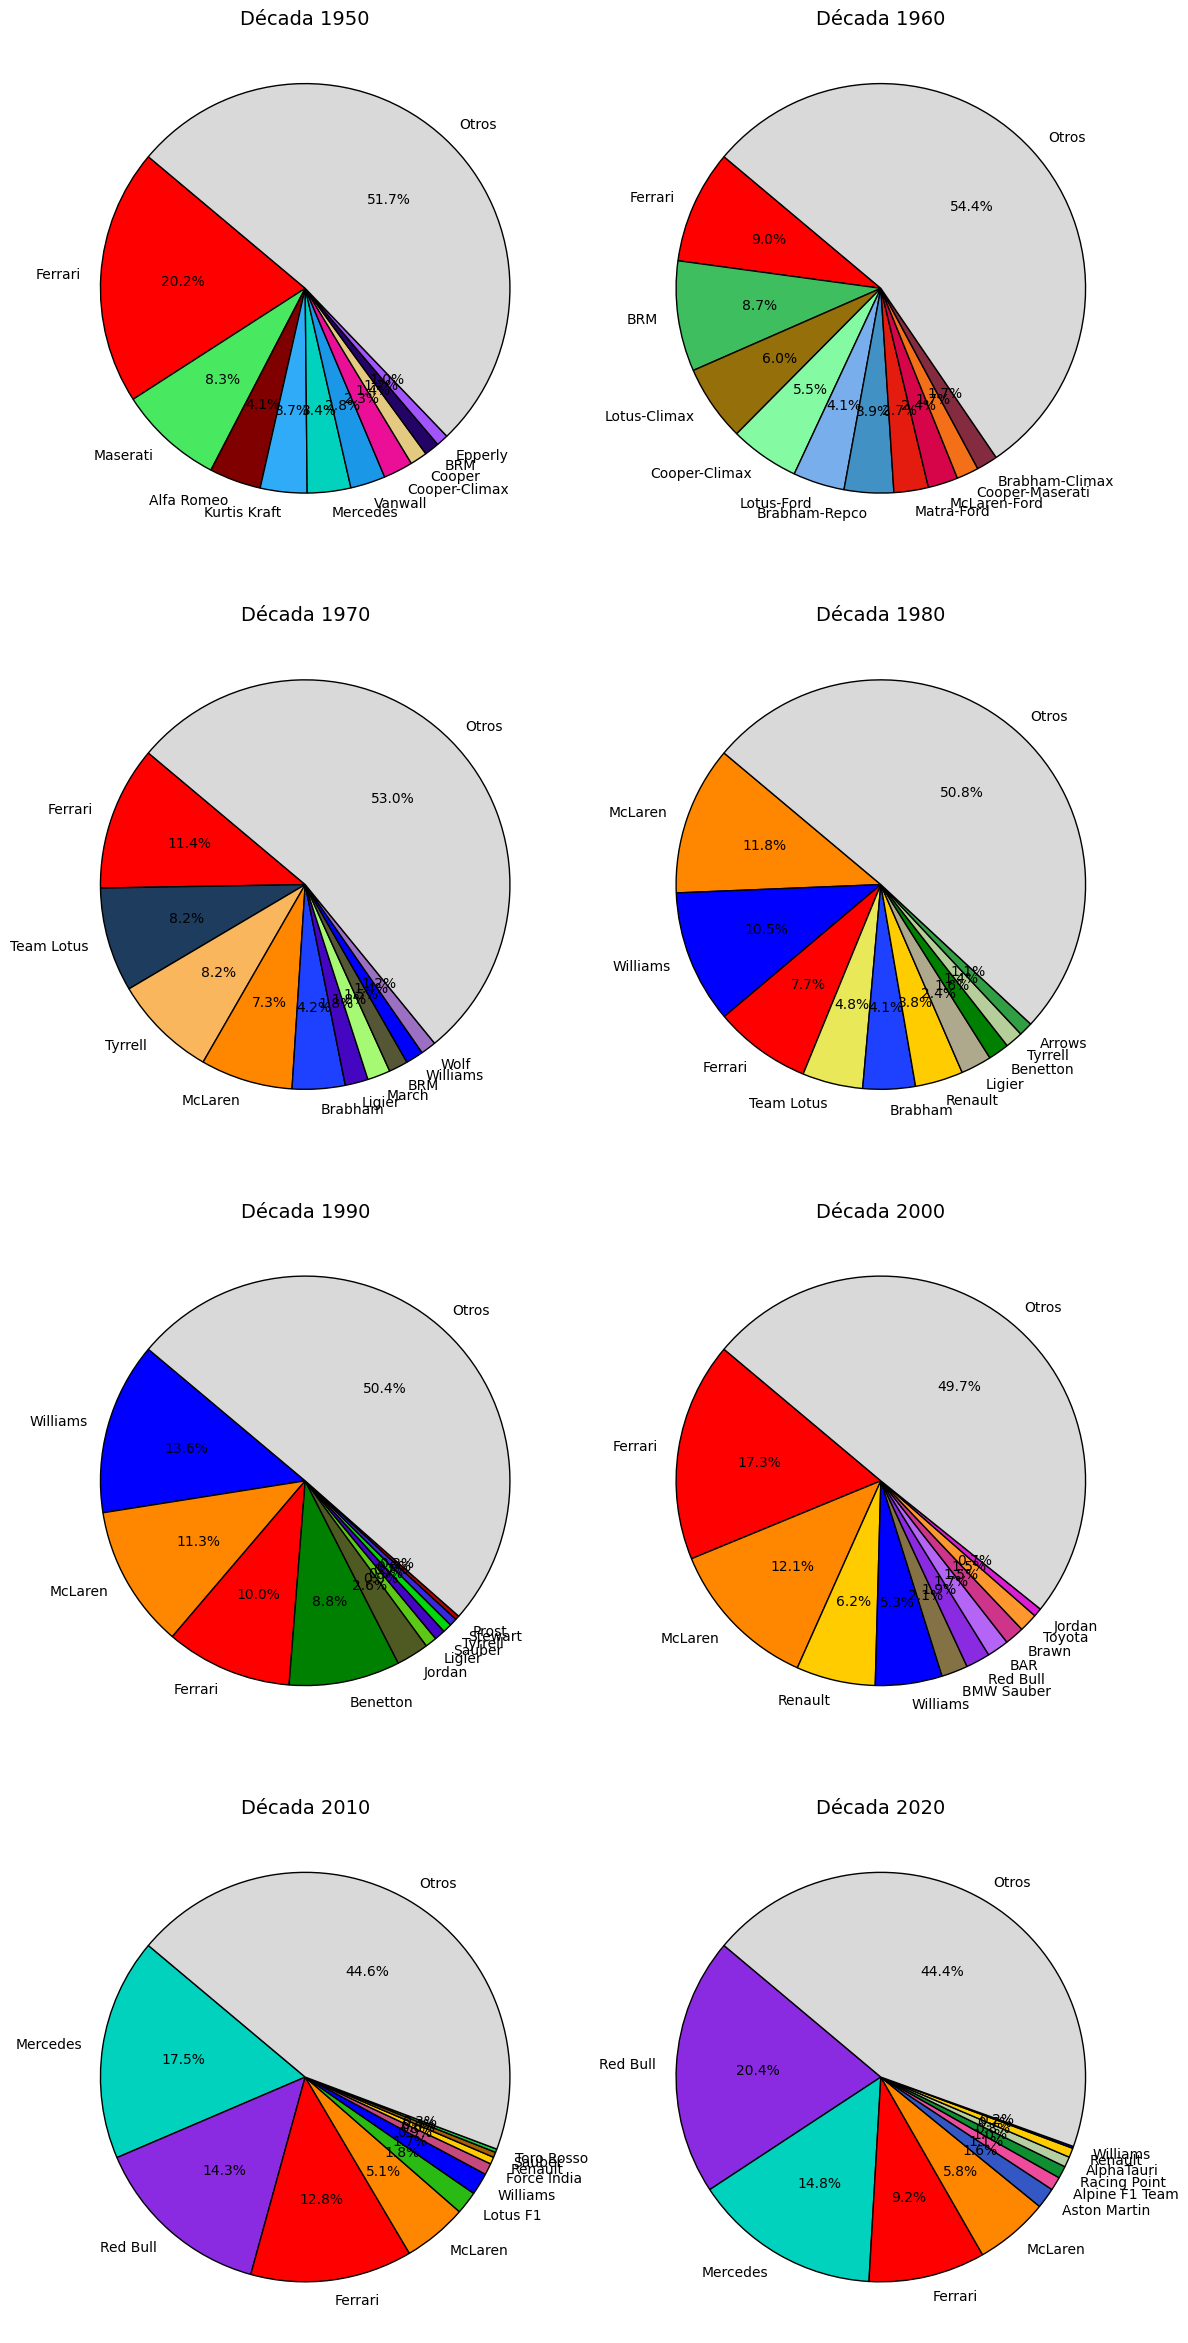

In [53]:
team_colors = {
    'Ferrari': '#ff0000',      # Rojo
    'McLaren': '#ff8700',      # Naranja
    'Williams': '#0000ff',     # Azul
    'Brabham': '#1e41ff',      # Azul oscuro
    'Mercedes': '#00d2be',     # Verde turquesa
    'Renault': '#ffcc00',      # Amarillo
    'Lotus': '#ffb3e6',        # Rosa
    'Benetton': '#008000',     # Verde
    'Red Bull': '#8a2be2',     # Púrpura
    'Alfa Romeo': '#800000'    # Marrón
}
other_color = '#d9d9d9'  # Color neutro para "Otros"

def assign_colors(constructor_names):
    random_colors = ['#%06x' % np.random.randint(0, 0xFFFFFF) for _ in range(len(constructor_names))]
    return [
        team_colors.get(name, random_colors.pop()) if name != 'Otros' else other_color
        for name in constructor_names
    ]

def plot_pie_charts(df, top_n=10):
    
    num_decades = len(df['decade'].unique())
    cols = 2  
    rows = (num_decades + 1) // cols + (num_decades % cols > 0)  

    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 6))  
    axes = axes.flatten()

    
    for i, decade in enumerate(sorted(df['decade'].unique())):
        df_decade = df[df['decade'] == decade]
        
        top_teams = df_decade.groupby('constructorName')['puntos_ajustados'].sum().nlargest(top_n)
        
        remaining_teams = df_decade.groupby('constructorName')['puntos_ajustados'].sum().nlargest(len(df_decade['constructorName'].unique()) - top_n)
        others = remaining_teams.sum() if remaining_teams.sum() > 0 else 0
        top_teams = pd.concat([top_teams, pd.Series({'Otros': others})])  
        
        colors = assign_colors(top_teams.index.tolist())
        
        wedges, texts, autotexts = axes[i].pie(
            top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140, 
            colors=colors, wedgeprops={'edgecolor': 'black'}
        )
        axes[i].set_title(f'Década {decade}', fontsize=14)

    for j in range(len(df['decade'].unique()), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_pie_charts(puntos_por_decada_filtrado)

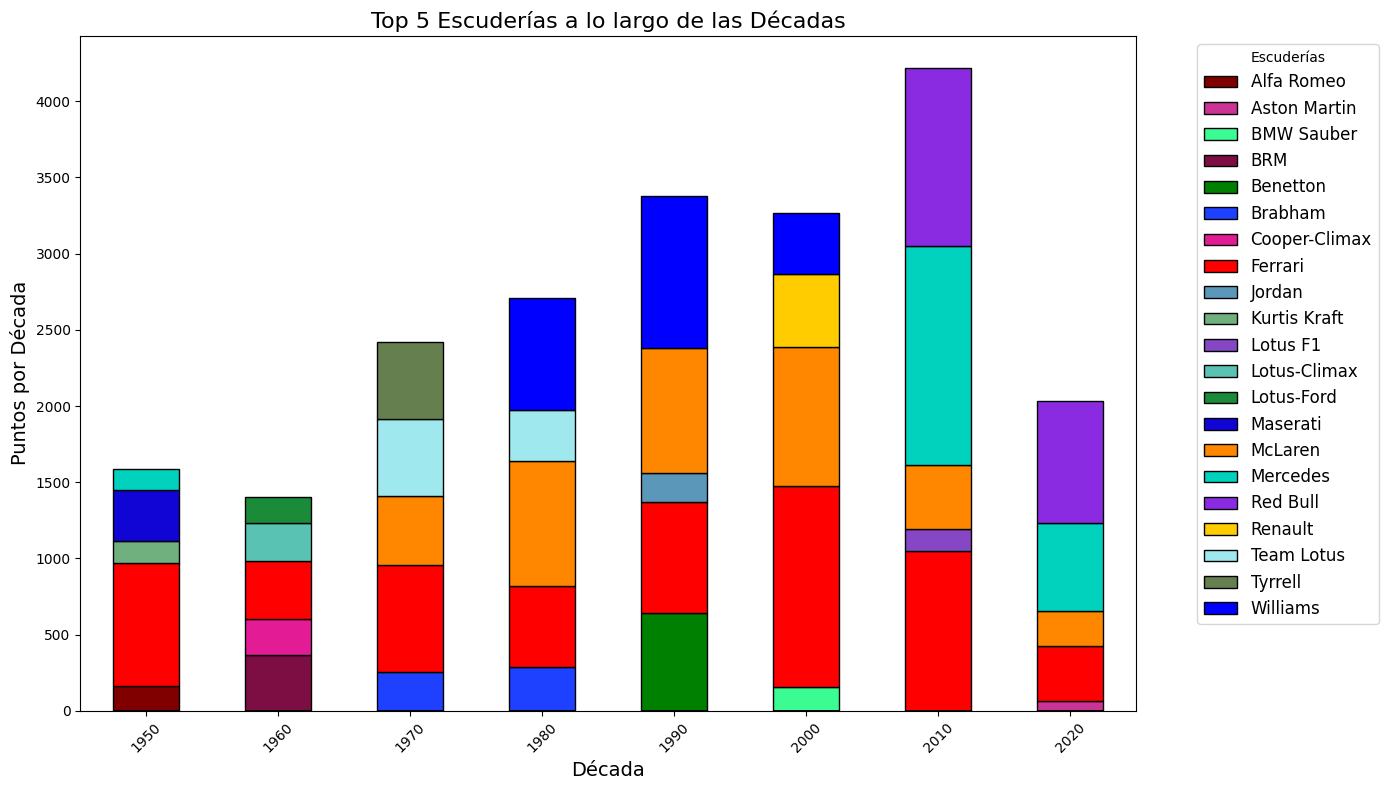

In [54]:
def plot_stacked_bar_chart(df):
    
    grouped = df.groupby(['decade', 'constructorName'])['puntos_ajustados'].sum().unstack(fill_value=0)

    top_5_by_decade = grouped.apply(lambda x: x.nlargest(5), axis=1)

    colors = assign_colors(top_5_by_decade.columns.tolist())

    top_5_by_decade.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), edgecolor='black')

    plt.title('Top 5 Escuderías a lo largo de las Décadas', fontsize=16)
    plt.xlabel('Década', fontsize=14)
    plt.ylabel('Puntos por Década', fontsize=14)
    plt.xticks(rotation=45)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Escuderías', fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_stacked_bar_chart(puntos_por_decada_filtrado)

**- Conclusiones:**

Tenemos dos graficos aqui, uno de tortas por cada decada donde se ven las 10 escuderias que mas puntos obtuvieron en base a nuestra metrica, y un grafico de barras apiladas donde podemos ver el top 5 de escuderias en base nuevamente a nuestra metrica.

Mas que Claro que viendolos se desprende que Ferrari es una gran escuderia que siempre se mantuvo entre los top de cada decada. Tambien se ve Mclaren en 6 decadas, Williams presente en 4 decadas diferentes, Renault en otras y ultimamente en las ultimas decadas aparecen Mercedes y Red Bull.

- Pasemos al Análisis del rendimiento histórico de las escuderias.
Hagamos un analsis mas a fondo para confirmar la consistencia de estas escuderias mencionadas.

Calculemos el numero de temporadas por escuderia, y saquemos un promedio de puntos (usando nuestra metrica) que hacen por temporada.

In [19]:
temporadas_por_equipo = df.groupby('constructorName')['year'].nunique().reset_index()
temporadas_por_equipo.rename(columns={'year': 'temporadas'}, inplace=True)
temporadas_por_equipo.head()


,constructorName,temporadas
0,AFM,2
1,AGS,6
2,ATS,8
3,Adams,1
4,Alfa Romeo,16


In [20]:
promedio_puntos_por_equipo = df.groupby('constructorName')['puntos_ajustados'].sum().reset_index()
promedio_puntos_por_equipo = pd.merge(promedio_puntos_por_equipo, temporadas_por_equipo, on='constructorName')
promedio_puntos_por_equipo['promedio_puntos'] = promedio_puntos_por_equipo['puntos_ajustados'] / promedio_puntos_por_equipo['temporadas']
promedio_puntos_por_equipo.head()

,constructorName,puntos_ajustados,temporadas,promedio_puntos
0,AFM,0,2,0.0000
1,AGS,0,6,0.0000
2,ATS,6,8,0.7500
3,Adams,0,1,0.0000
4,Alfa Romeo,217,16,13.5625


- Grafiquemos: Usemos un grafico de dispersion con las siguientes características:

Eje X: Número de temporadas (temporadas).  
Eje Y: Promedio de puntos por temporada (promedio_puntos).  
Tamaño del punto: Total de puntos acumulados (total_puntos).

- Conclusiones que se pueden sacar en base a este grafico:

-Escuderías en la parte superior derecha tienen alto promedio y muchas temporadas, mostrando consistencia y éxito.  
-Escuderías en la parte superior izquierda tienen alto promedio con pocas temporadas, mostrando dominio en años específicos.  
-Escuderías en la parte inferior, sin importar temporadas, tienen bajo promedio, mostrando bajo rendimiento.

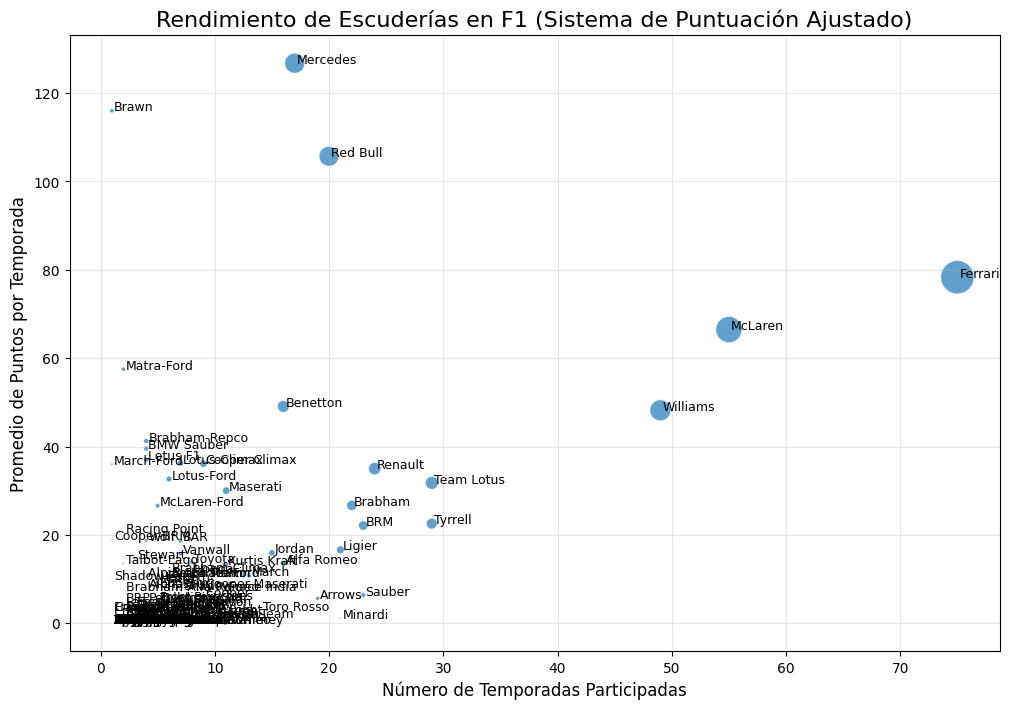

In [55]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    promedio_puntos_por_equipo['temporadas'],
    promedio_puntos_por_equipo['promedio_puntos'],
    s=promedio_puntos_por_equipo['puntos_ajustados'] / 10,  
    alpha=0.7,
    edgecolors='w'
)

for i, row in promedio_puntos_por_equipo.iterrows():
    plt.text(row['temporadas'] + 0.2, row['promedio_puntos'], row['constructorName'], fontsize=9)

plt.title('Rendimiento de Escuderías en F1 (Sistema de Puntuación Ajustado)', fontsize=16)
plt.xlabel('Número de Temporadas Participadas', fontsize=12)
plt.ylabel('Promedio de Puntos por Temporada', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**- Conclusiones:**

Ferrari sin dudas la escuderia que mas temporadas tiene en la F1 y la que demuestra mayor consistencia a lo largo de los años. McLaren y Williams que demuestran una consistencia considerable si tomamos que tienen mas de 48 temporadas en la F1.  
Si miramos en la parte superior pero mas a la izquierda nos encontramos con Mercedes y Red Bull, escuderias con bastante menos temporadas pero con un gran rendimiento ya que su promedio de puntos es alto.

## Tema 2: Relación entre pilotos, equipos y circuito.  
**Imaginemosnos que nos contrata el area de marketing de una marca que quiere hacer un patrocinio en el circuito de Monaco. La idea es patrocinar al que creeemos que va ganar la carrera, pero no sabemos quien, si escojer una escuderia en particular o un piloto. Analicemos este escenario. (Enfoque en Negocios y entretenimiento (Media & Sponsorship Analytics))**

- Buscamos como se llama el circuito de monaco en la columna "circuitName".

In [56]:
valores_con_monaco = df['circuitName'][df['circuitName'].str.contains('Monaco', case=False, na=False)]
valores_con_monaco

108      Circuit de Monaco
109      Circuit de Monaco
110      Circuit de Monaco
111      Circuit de Monaco
112      Circuit de Monaco
               ...        
26434    Circuit de Monaco
26435    Circuit de Monaco
26436    Circuit de Monaco
26437    Circuit de Monaco
26438    Circuit de Monaco
Name: circuitName, Length: 1664, dtype: object

- Primeros filtraremos nuestro df para quedarnos solo con las carreras que tuvimos en 'Circuit de Monaco'. Luego focalizemosnos con las escuderias y pilotos de los ultimos 5 años.

In [23]:
df_mónaco = df[(df['circuitName'] == 'Circuit de Monaco') & (df['year'] >= 2019)]

In [24]:
df_mónaco.head()

,resultId,raceId,driverName,constructorName,grid,positionText,points,circuitName,year,grandPrixName,date,decade,puntos_ajustados
24300,24306,1015,Lewis Hamilton,Mercedes,1,1,25.0,Circuit de Monaco,2019,Monaco Grand Prix,2019-05-26,2010,8
24301,24307,1015,Sebastian Vettel,Ferrari,4,2,18.0,Circuit de Monaco,2019,Monaco Grand Prix,2019-05-26,2010,6
24302,24308,1015,Valtteri Bottas,Mercedes,2,3,15.0,Circuit de Monaco,2019,Monaco Grand Prix,2019-05-26,2010,4
24303,24309,1015,Max Verstappen,Red Bull,3,4,12.0,Circuit de Monaco,2019,Monaco Grand Prix,2019-05-26,2010,3
24304,24310,1015,Pierre Gasly,Red Bull,8,5,11.0,Circuit de Monaco,2019,Monaco Grand Prix,2019-05-26,2010,2


- Veamos que pilotos son los que mas puntos sumaron en este circuito.

In [57]:
df_puntos = df_mónaco.groupby('driverName')['points'].sum().loc[lambda x: x > 0].sort_values(ascending=False)
df_puntos.head()

driverName
Max Verstappen     85.0
Carlos Sainz       63.0
Lewis Hamilton     56.0
Charles Leclerc    45.0
Lando Norris       38.0
Name: points, dtype: float64

- Grafiquemos esto.

C:\Users\eze_g\AppData\Local\Temp\ipykernel_14988\3953865925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_puntos.index, y=df_puntos.values, palette="Blues_d")


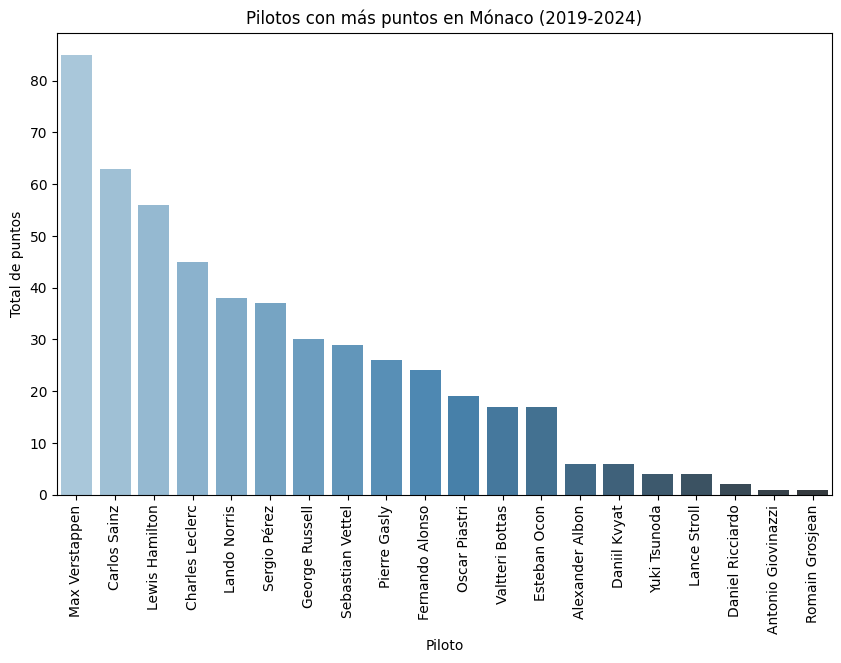

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_puntos.index, y=df_puntos.values, palette="Blues_d")
plt.title('Pilotos con más puntos en Mónaco (2019-2024)')
plt.xlabel('Piloto')
plt.ylabel('Total de puntos')
plt.xticks(rotation=90)
plt.show()


**- Conclusiones:**  
Max Verstappen (Red Bull) seria nuestra mejor opcion, seguido a Carlos Sainz (Para la proxima temporada estara en Williams), Hamilton (Firmo con Ferrari para el 2025) y Leclerc (Ferrari).

- Veamos las escuderias, para ver si matchean con algunos de estos pilotos.

In [27]:
df_puntos_equipos = df_mónaco.groupby('constructorName')['points'].sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(df_puntos_equipos)

constructorName
Red Bull          133.0
Ferrari           118.0
Mercedes          101.0
McLaren            65.0
Aston Martin       33.0
Alpine F1 Team     30.0
Toro Rosso         10.0
AlphaTauri          8.0
RB F1 Team          4.0
Alfa Romeo          3.0
Renault             2.0
Williams            2.0
Haas F1 Team        1.0
Name: points, dtype: float64


C:\Users\eze_g\AppData\Local\Temp\ipykernel_14988\3708061929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_puntos_equipos.index, y=df_puntos_equipos.values, palette="Reds_d")


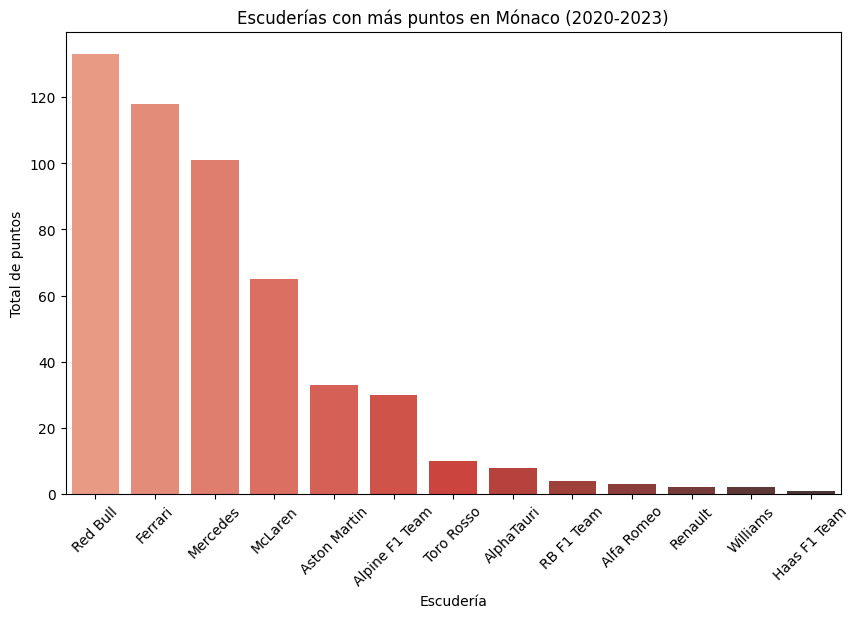

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_puntos_equipos.index, y=df_puntos_equipos.values, palette="Reds_d")
plt.title('Escuderías con más puntos en Mónaco (2020-2023)')
plt.xlabel('Escudería')
plt.ylabel('Total de puntos')
plt.xticks(rotation=45)
plt.show()

**- Conclusion:**  
Red Bull en primer lugar, al igual que su piloto Max Verstappen. Es nuestra mejor opcion para patrocinar sin dudas. Si no se consiguiera se podria ir por Ferrari con Hamilton o Leclerc. Carlos Sainz en cambio acaba de firmar con Williams que vemos que no tiene buen rendimiento en este circuito, solo a conseguido escasos puntos. No seria una buena opcion para nosotros.

## Tema 3: Puntos y campeonatos
**¿Existe una relación entre el porcentaje de puntos por carrera y ganar el campeonato?**  
Análisis estadístico del porcentaje de puntos por carrera de los campeones.  
**¿Alguien ha ganado el campeonato sin haber ganado ni una carrera?**  
Exploración de casos excepcionales en la historia de la F1.  
**¿Qué pilotos lograron ganar el campeonato con el menor número de puntos?**  
(Enfoque en estrategia basada en datos (Data-Driven Strategy))

- Comencemos con la primera parte del tema, porcentaje de puntos obtenidos por temporada. Usar una metrica ira a equiparar todos los años, ya que como sabemos la FIA ha cambiado algunas veces el sistema de puntuacion. 

In [58]:
df_points = df[df['points'] > 0]

champions = df_points.groupby(['year', 'driverName'])['points'].sum().reset_index()
champions = champions.loc[champions.groupby('year')['points'].idxmax()]
champions

,year,driverName,points
13,1950,Nino Farina,30.00
29,1951,Juan Fangio,37.00
42,1952,Alberto Ascari,53.50
63,1953,Alberto Ascari,46.50
90,1954,Juan Fangio,57.14
...,...,...,...
1436,2020,Lewis Hamilton,347.00
1455,2021,Max Verstappen,388.50
1474,2022,Max Verstappen,433.00
1497,2023,Max Verstappen,530.00


In [30]:
total_puntos_por_temporada = df_points.groupby('year')['points'].sum().reset_index()
total_puntos_por_temporada.rename(columns={'points': 'total_puntos_temporada'}, inplace=True)
total_puntos_por_temporada

,year,total_puntos_temporada
0,1950,168.00
1,1951,192.00
2,1952,192.00
3,1953,216.00
4,1954,215.56
...,...,...
70,2020,1734.00
71,2021,2189.50
72,2022,2242.00
73,2023,2242.00


In [31]:
champions_pct_points = pd.merge(champions, total_puntos_por_temporada, on="year")
champions_pct_points ["pct_points"] = champions_pct_points ["points"] / champions_pct_points ["total_puntos_temporada"]
champions_pct_points

,year,driverName,points,total_puntos_temporada,pct_points
0,1950,Nino Farina,30.00,168.00,0.178571
1,1951,Juan Fangio,37.00,192.00,0.192708
2,1952,Alberto Ascari,53.50,192.00,0.278646
3,1953,Alberto Ascari,46.50,216.00,0.215278
4,1954,Juan Fangio,57.14,215.56,0.265077
...,...,...,...,...,...
70,2020,Lewis Hamilton,347.00,1734.00,0.200115
71,2021,Max Verstappen,388.50,2189.50,0.177438
72,2022,Max Verstappen,433.00,2242.00,0.193131
73,2023,Max Verstappen,530.00,2242.00,0.236396


- Ahora graficamos en base al porcentaje de puntos que cada campeon obtuvo.

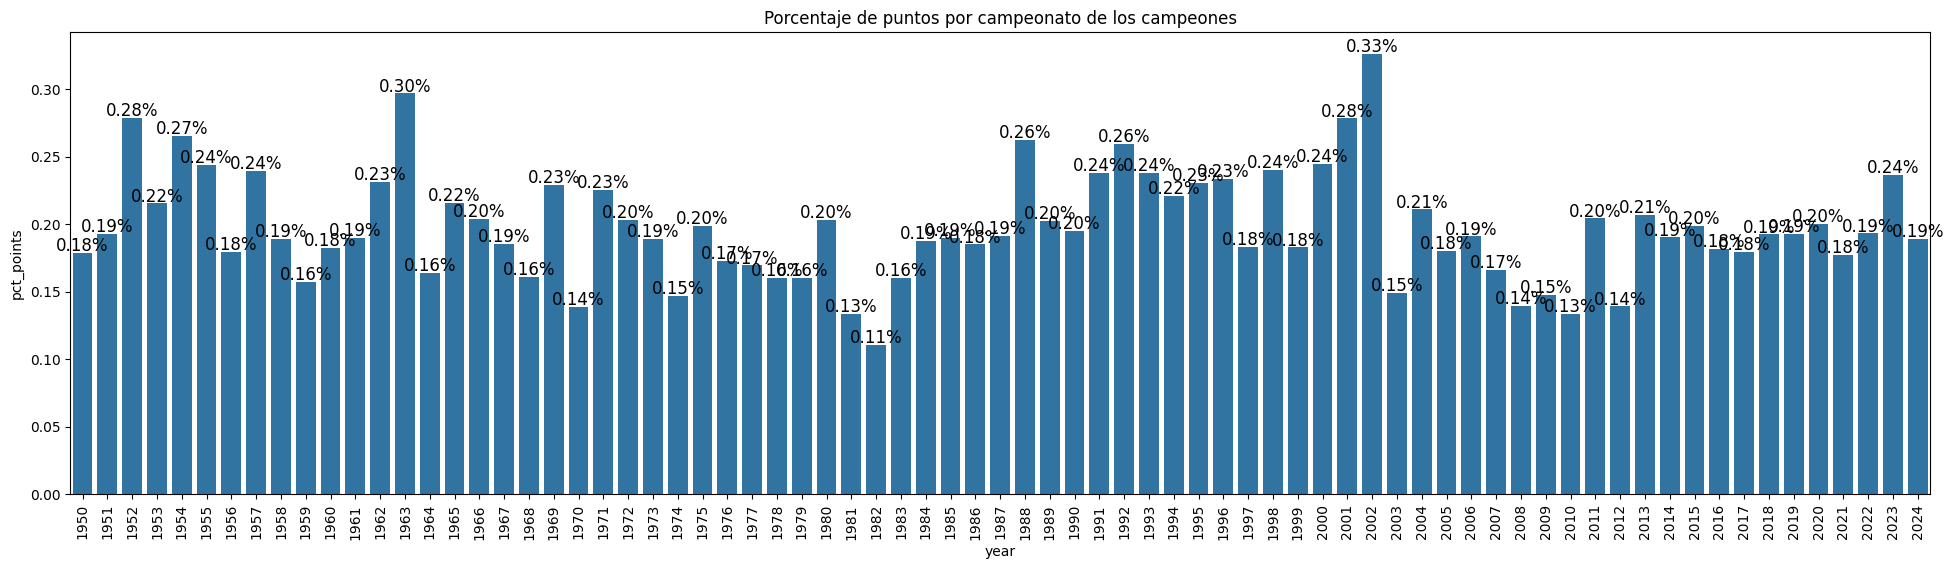

In [32]:
plt.figure(figsize=(24, 6))
ax = sns.barplot(x='year', y='pct_points', data=champions_pct_points)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', 
                fontsize=12, color='black',  
                xytext=(0, 5), textcoords='offset points')  

plt.title('Porcentaje de puntos por campeonato de los campeones')
plt.xticks(rotation=90)
plt.show()


In [33]:
champions_pct_points.describe()

,year,points,total_puntos_temporada,pct_points
count,75.000000,75.000000,75.000000,75.000000
mean,1987.000000,132.968533,692.880667,0.198112
std,21.794495,127.471826,671.092012,0.040182
min,1950.000000,30.000000,167.990000,0.110276
25%,1968.500000,53.750000,275.000000,0.178005
50%,1987.000000,76.000000,400.000000,0.190955
75%,2005.500000,128.000000,682.500000,0.223304
max,2024.000000,530.000000,2242.000000,0.325792


**- Conclusiones:**  
Media en 0.198, mediana no muy alegada en 0.19095, una desviacion estandar baja. Si un piloto lograra acumular consistentemente el 0.19% de los puntos disponibles en cada carrera, tendría una alta probabilidad de competir por el campeonato, posicionándose como un serio contendiente en la lucha por el título.  

- Vemos unos casos donde el porcentaje de puntos del campeon fue bien mayor. En el 2002 tenemos que el campeon obtuvo el 0.33 por ciento de los puntos, casi un tercio del total. Quien fue? podemos decir que es el mejor camepon en toda la historia?

In [34]:
champions_pct_points[champions_pct_points ["year"] == 2002]

,year,driverName,points,total_puntos_temporada,pct_points
52,2002,Michael Schumacher,144.0,442.0,0.325792


Quien mas que Michael Schumacher en su epoca dorada. Ese año donde practicamente cada carrera tenia siempre el mismo top 2, Schumacher primero y Rubens Barrichello en segunda posicion. Es una discusion de hoy en dia si el es el mejor de la historia.

- Volviendo al análisis de la tabla y los datos estadísticos del dataframe "champions_pct_points", ¿es una buena estrategia obtener 0.20 puntos por carrera para ser campeón mundial sin necesidad de ganar ninguna carrera? ¿Ha habido alguna temporada en la que el campeón no haya ganado ninguna carrera? Vamos a analizarlo.

In [35]:
campeones = df.groupby(['year', 'driverName'])['points'].sum().reset_index()
campeones = campeones.loc[campeones.groupby('year')['points'].idxmax()]

def gano_carrera(driver, year):
    filtro = (df['driverName'] == driver) & (df['year'] == year)
    return (df.loc[filtro, 'positionText'] == '1').any()

campeones['gano_carrera'] = campeones.apply(lambda row: gano_carrera(row['driverName'], row['year']), axis=1)

ganadores_sin_carreras = campeones[~campeones['gano_carrera']]
ganadores_sin_carreras

,year,driverName,points,gano_carrera


In [36]:
campeones["gano_carrera"].unique()

array([ True])

**Conclusion:** No existe ningun campeon mundial que haya ganado una temporada completa sin ganar ni una sola carrera.

**¿Qué pilotos lograron ganar el campeonato con el menor porcentaje de puntos? Analicemos esos casos y veamos cuantas carreras ganaron.**  
Viendo el grafico anterios los tres casos con menor porcentaje de puntos ganados son en 1982 con 11%, 1981 con 13% y 2010 con 13% tambien. Quienes fueron?

In [37]:
champions_pct_points[champions_pct_points["year"]==1982]

,year,driverName,points,total_puntos_temporada,pct_points
32,1982,Keke Rosberg,44.0,399.0,0.110276


In [38]:
champions_pct_points[champions_pct_points["year"]==1981]

,year,driverName,points,total_puntos_temporada,pct_points
31,1981,Nelson Piquet,50.0,375.0,0.133333


In [39]:
champions_pct_points[champions_pct_points["year"]==2010]

,year,driverName,points,total_puntos_temporada,pct_points
60,2010,Sebastian Vettel,256.0,1919.0,0.133403


- Cuantas carreras ganaron en esos campeonatos? y cuantas carreras ganaron otros pilotos ese mismo año? acaso puede haber un piloto que gano mas carreras que el campeon del año? Veamos

In [40]:
#1981
df_año = df[df['year'] == 1981]
carreras_ganadas = df_año[df_año['positionText'] == '1']
carreras_ganadas_por_piloto = carreras_ganadas.groupby('driverName').size().reset_index(name='carreras_ganadas')
carreras_ganadas_por_piloto = carreras_ganadas_por_piloto.sort_values(by='carreras_ganadas', ascending=False)
carreras_ganadas_por_piloto

,driverName,carreras_ganadas
0,Alain Prost,3
6,Nelson Piquet,3
1,Alan Jones,2
2,Carlos Reutemann,2
3,Gilles Villeneuve,2
4,Jacques Laffite,2
5,John Watson,1


1981, El camepon mundial Piquet gano la misma cantidad de carreras que Alain Prost.

In [41]:
#1982
df_año = df[df['year'] == 1982]
carreras_ganadas = df_año[df_año['positionText'] == '1']
carreras_ganadas_por_piloto = carreras_ganadas.groupby('driverName').size().reset_index(name='carreras_ganadas')
carreras_ganadas_por_piloto = carreras_ganadas_por_piloto.sort_values(by='carreras_ganadas', ascending=False)
carreras_ganadas_por_piloto

,driverName,carreras_ganadas
0,Alain Prost,2
1,Didier Pironi,2
3,John Watson,2
9,René Arnoux,2
7,Niki Lauda,2
2,Elio de Angelis,1
4,Keke Rosberg,1
6,Nelson Piquet,1
5,Michele Alboreto,1
8,Patrick Tambay,1


1982, el campeon mundial Keke Rosberg solo gano una carrera, mientras que otros 6 pilotos que ganaron dos. Una clara muestra que la consistencia a traves de todas las carreras te puede llevar a campeonar incluso si no tenes tantas victorias.

In [42]:
#2010
df_año = df[df['year'] == 2010]
carreras_ganadas = df_año[df_año['positionText'] == '1']
carreras_ganadas_por_piloto = carreras_ganadas.groupby('driverName').size().reset_index(name='carreras_ganadas')
carreras_ganadas_por_piloto = carreras_ganadas_por_piloto.sort_values(by='carreras_ganadas', ascending=False)
carreras_ganadas_por_piloto

,driverName,carreras_ganadas
0,Fernando Alonso,5
4,Sebastian Vettel,5
3,Mark Webber,4
2,Lewis Hamilton,3
1,Jenson Button,2


2010, Vettel gano la misma cantidad de carreras que Alonso, 5 cada uno.

**- Conclusion:**  Obviamente ganar la mayor cantidad de carreras te puede a llevar a ser campeon mundial, pero a veces mantener la consistencia a lo largo de la temporada es suficiente para llevarte el titulo.